# Alive & Thrive
## Viet Nam Data: Women Files - Charts
## Prepared by Aaron Wise; aaron@a3di.dev
### Version: 12 July 2022

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tabulate import read_csv_file, create_bivariate_var_dep, create_reduced_df
from aw_analytics import mean_wt

In [ ]:
# Set parameters
country = 'VNM'
recode = 'women'

In [ ]:
# Read in combined file
df = read_csv_file(country, recode, file_type='combined')

In [ ]:
# Title dict
titles_dict = {
    "anc_4_visits":  "Women attended 4+ times by any provider: ",
    "anc_3_components": "Women with 3 components of ANC tested at least once: ",
    "inst_delivery": "Delivery in a health facility: ",
    "caesarean_del": "Caesarean delivery: ",
    "pnc_mother": "Mother received post-partum care (2 days): ",
    "low_bw": "Baby had low birthweight (< 2.5kg): ",
    "early_bf": "Initiated breastfeeding within 1 hour: "
    }

ind_vars_dict = {
    "residence": "Urban vs. Rural",
    "region": "Regions",
    "mother_edu": "Woman's Education",
    "wealth_q": "Wealth Quintiles",
    "eth_hoh": "Ethnicity",
    "elderly_hoh": "Elderly-Headed Households",
    "sex_hoh": "Sex Head of Household "
}

In [ ]:
# # Set parameters
# var_dep_list = ['anc_4_visits', 'anc_3_components', 'inst_delivery', 'caesarean_del', 'pnc_mother', 'low_bw', 'early_bf'] 

# ind_var_list = ['residence', 'region', 'mother_edu', 'wealth_q', 'eth_hoh', 'elderly_hoh', 'sex_hoh']

In [ ]:
# --- Create chart

# Set chart params
var_dep = ['low_bw']
ind_var = ['wealth_q']
weight = ['wmweight']

In [122]:
# Remove rows if data for var_dep is missing
df = df.dropna(subset=[var_dep[0]])

# Get Year info for dynamically setting params
num_years = df['Year'].nunique()
year_min = df['Year'].min()
year_max = df["Year"].max()

year_list = ['2000', '2005', '2010', '2015', '2020']

year_range = year_list[-(num_years):]

print(year_min, year_max, (num_years), year_range)


2000 2021 5 ['2000', '2005', '2010', '2015', '2020']


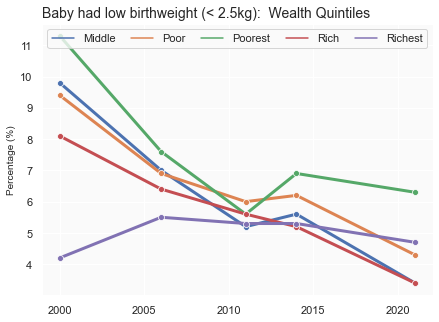

In [143]:
## Generate chart
fig, ax = plt.subplots(figsize=(7, 5))

### Set seaborn parameters
sns.set_theme()
sns.set_style("darkgrid", {"axes.facecolor": ".98"})

ax = sns.lineplot(
    x = 'Year',
    y = var_dep[0],
    data = df.groupby(['Year', ind_var[0]]).apply(mean_wt, var_dep[0], wt = weight[0]).to_frame(var_dep[0]),
    hue = ind_var[0],
    palette = "deep",
    linewidth = 3,
    marker='o'
    )


# Title/subtitle settings
title_string = f'{titles_dict[var_dep[0]]} {ind_vars_dict[ind_var[0]]}'
ax.set_title(title_string, loc="left", fontsize = 14)

# Axis labels
ax.set_xlabel('', fontsize = 10)
ax.set_ylabel('Percentage (%)', fontsize = 10)

# Dynamically set ticks
# ax.set_yticks()
ax.set_xticks(np.arange(int(year_range[0]), (int(year_range[-1]) + 1), (num_years)), year_range)


ax.legend(loc='best', mode = "expand", ncol = 5)


fig.savefig('test.svg', transparent=False, dpi=300, bbox_inches="tight")

In [115]:
np.arange(int(year_range[0]), int(year_range[-1])+1, (num_years))

array([2000, 2005, 2010, 2015, 2020])

In [128]:
max(year_range)

'2020'